# Building Artificial Neural Network

- MNIST Dataset

### Step 1: Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
# !pip install tensorflow

### Step 2: Load and preprocess the MNIST dataset from mnist.csv

In [17]:
mnist_df = pd.read_csv('mnist.csv')
mnist_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
mnist_df["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [19]:
# Split the dataset into features (pixels) and labels (target)

features = mnist_df.drop('label', axis=1)
labels = mnist_df['label']

In [20]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0

In [21]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [22]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)
features

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [23]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

### Step 3: Build the ANN model

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(256, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 4: Compile the model

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

In [26]:
# model.summary()

In [27]:
# # List of optimizers to try
# optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']

# # List of loss functions to try
# losses = ['sparse_categorical_crossentropy', 'categorical_crossentropy','mean_squared_error']

# activation = leaky_relu, relu, sigmoid, tanh, softmax

### Step 5: Train the model

In [28]:
model.fit(features, labels, epochs = 5)  # You can adjust the number of epochs


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8625 - loss: 0.4709
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9603 - loss: 0.1358
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9715 - loss: 0.0920
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9778 - loss: 0.0697
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9821 - loss: 0.0580


In [29]:
model.fit(features, labels, epochs = 5)  # You can adjust the number of epochs

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9851 - loss: 0.0461
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9853 - loss: 0.0405
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9891 - loss: 0.0324
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9911 - loss: 0.0263
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9914 - loss: 0.0255


In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    keras.layers.Dropout(0.3),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    keras.layers.Dropout(0.3),                   # Dropout layer again
    keras.layers.Dense(64, activation='relu'),   # Third hidden layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),   # Third hidden layer with 64 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(features, labels, epochs=5)  # You can adjust the number of epochs


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.7822 - loss: 0.6690
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9428 - loss: 0.1852
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9583 - loss: 0.1416
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9636 - loss: 0.1225
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9682 - loss: 0.1062


### Step 6: Make predictions

In [31]:
predictions = model.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step


### Step 7: Visualize the results

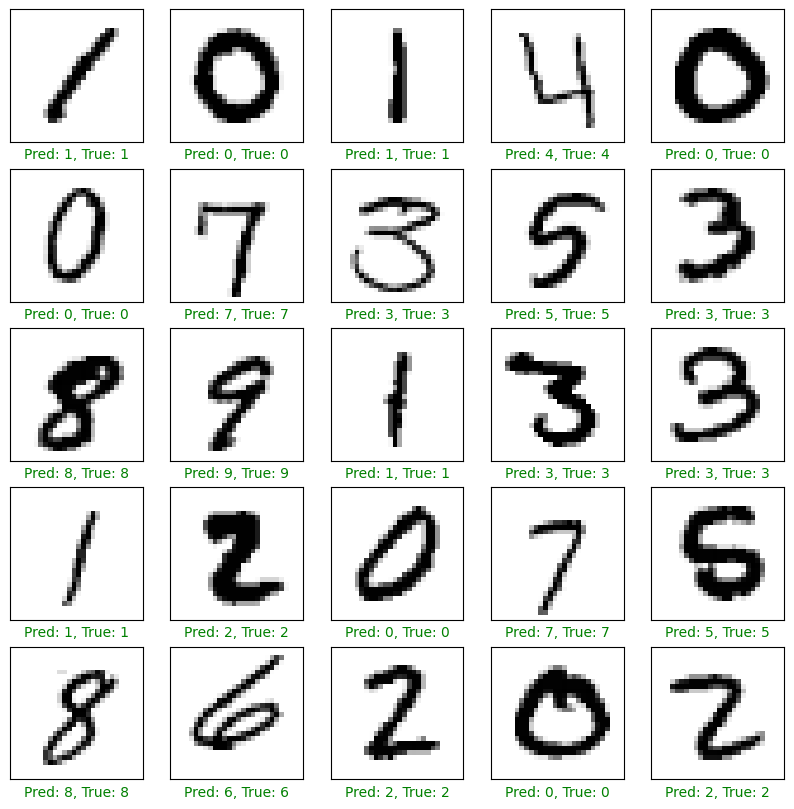

In [32]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()